<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine-Learning-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport

In [ ]:
df1 = pd.read_csv('/content/Chicago_Crimes_2001_to_2004.csv')
df2 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
df3 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
df4 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)
data = pd.concat([df1, df2, df3], ignore_index=False, axis=0)

<ipython-input-6-dbc8fa3d4704>:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/Chicago_Crimes_2001_to_2004.csv')
<ipython-input-6-dbc8fa3d4704>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
<ipython-input-6-dbc8fa3d4704>:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
<ipython-input-6-dbc8fa3d4704>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df3 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
<ipython-input-6-dbc8fa3d4704>:3: DtypeWarning: Columns

In [ ]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [ ]:
data.shape

(285177, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285177 entries, 0 to 91384
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            285177 non-null  int64  
 1   ID                    285177 non-null  int64  
 2   Case Number           285177 non-null  object 
 3   Date                  285177 non-null  object 
 4   Block                 285176 non-null  object 
 5   IUCR                  285175 non-null  object 
 6   Primary Type          285175 non-null  object 
 7   Description           285175 non-null  object 
 8   Location Description  285156 non-null  object 
 9   Arrest                285174 non-null  object 
 10  Domestic              285174 non-null  object 
 11  Beat                  285174 non-null  float64
 12  District              285173 non-null  float64
 13  Ward                  187446 non-null  float64
 14  Community Area        187318 non-null  float64
 15  F

In [ ]:
data = data.drop(columns=['Unnamed: 0','ID','Case Number'], axis=1)

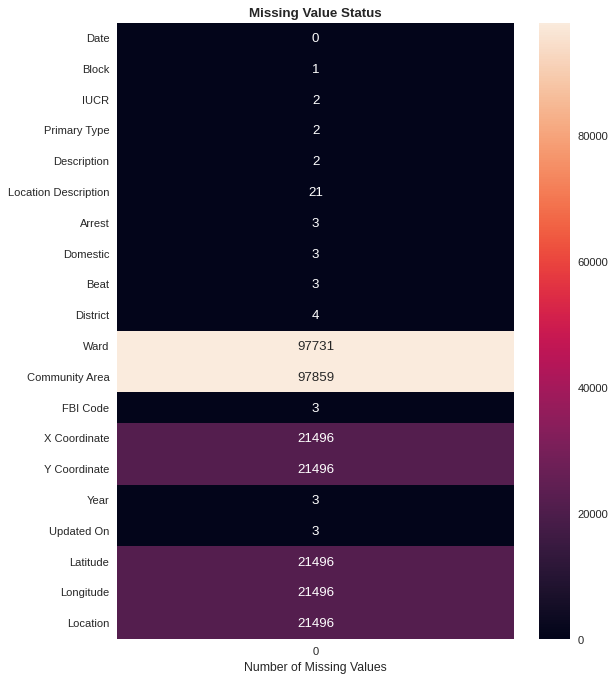

In [ ]:
#Plot missing values
pl.figure(figsize=(8, 10), dpi=80)
pl.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='rocket')
ax.set_xlabel('Number of Missing Values')
pl.show()

In [ ]:
data = data.dropna()

In [ ]:
data = data.drop_duplicates()

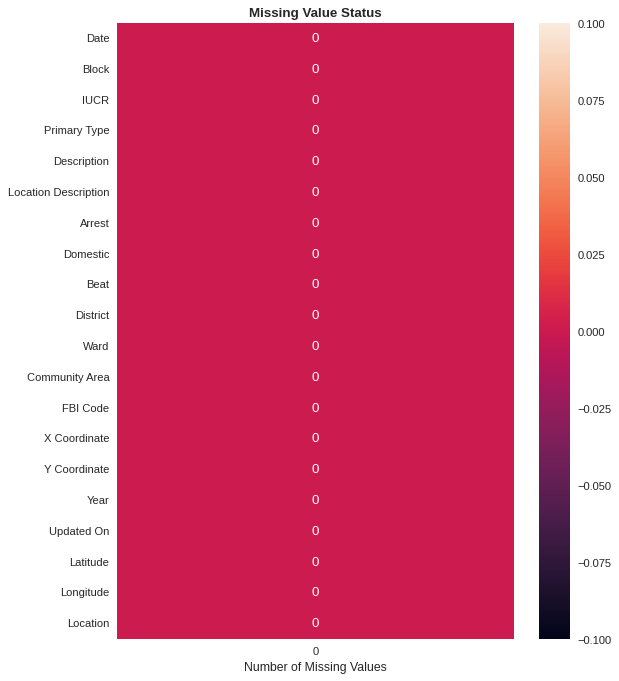

In [ ]:
pl.figure(figsize=(8, 10), dpi=80)
pl.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='rocket')
ax.set_xlabel('Number of Missing Values')
pl.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,169303.000,169303.000,169303.000,169303.000,169303.000,169303.000,169303.000,169303.000,169303.000
mean,1194.243,11.232,22.363,38.136,1164549.035,1885064.391,2006.883,41.840,-87.672
std,700.734,6.893,13.745,21.611,17039.437,32467.750,1.112,0.089,0.062
min,111.000,1.000,1.000,0.000,0.000,0.000,2001.000,36.619,-91.687
25%,623.000,6.000,10.000,23.000,1152986.000,1858468.000,2006.000,41.767,-87.714
50%,1034.000,10.000,21.000,33.000,1165970.000,1888910.000,2006.000,41.851,-87.666
75%,1724.000,16.000,33.000,58.000,1176348.500,1908875.000,2008.000,41.906,-87.629
max,2535.000,31.000,50.000,77.000,1205117.000,1951507.000,2011.000,42.023,-87.525


In [ ]:
data.describe(include='object')

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,FBI Code,Updated On,Location
count,169303,169303,169303,169303,169303,169303,169303,169303,169303,169303,169303
unique,77688,24978,315,28,293,124,2,2,26,306,99505
top,01/01/2008 12:00:00 AM,100XX W OHARE ST,0486,BATTERY,SIMPLE,STREET,False,False,06,04/15/2016 08:55:02 AM,"(41.976290414, -87.905227221)"
freq,51,750,15051,32671,19432,44652,121817,148242,32260,91412,750


In [ ]:
Classes = data['Primary Type'].unique()
Classes

array(['OTHER OFFENSE', 'THEFT', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'HOMICIDE', 'ROBBERY', 'BATTERY', 'ARSON', 'BURGLARY', 'ASSAULT',
       'NARCOTICS', 'INTIMIDATION', 'PROSTITUTION',
       'PUBLIC PEACE VIOLATION', 'WEAPONS VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'LIQUOR LAW VIOLATION',
       'KIDNAPPING', 'STALKING', 'GAMBLING', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'OBSCENITY'], dtype=object)

In [ ]:
crimes_count_date = data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(20, 35), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

<Axes: xlabel='count', ylabel='Location Description'>

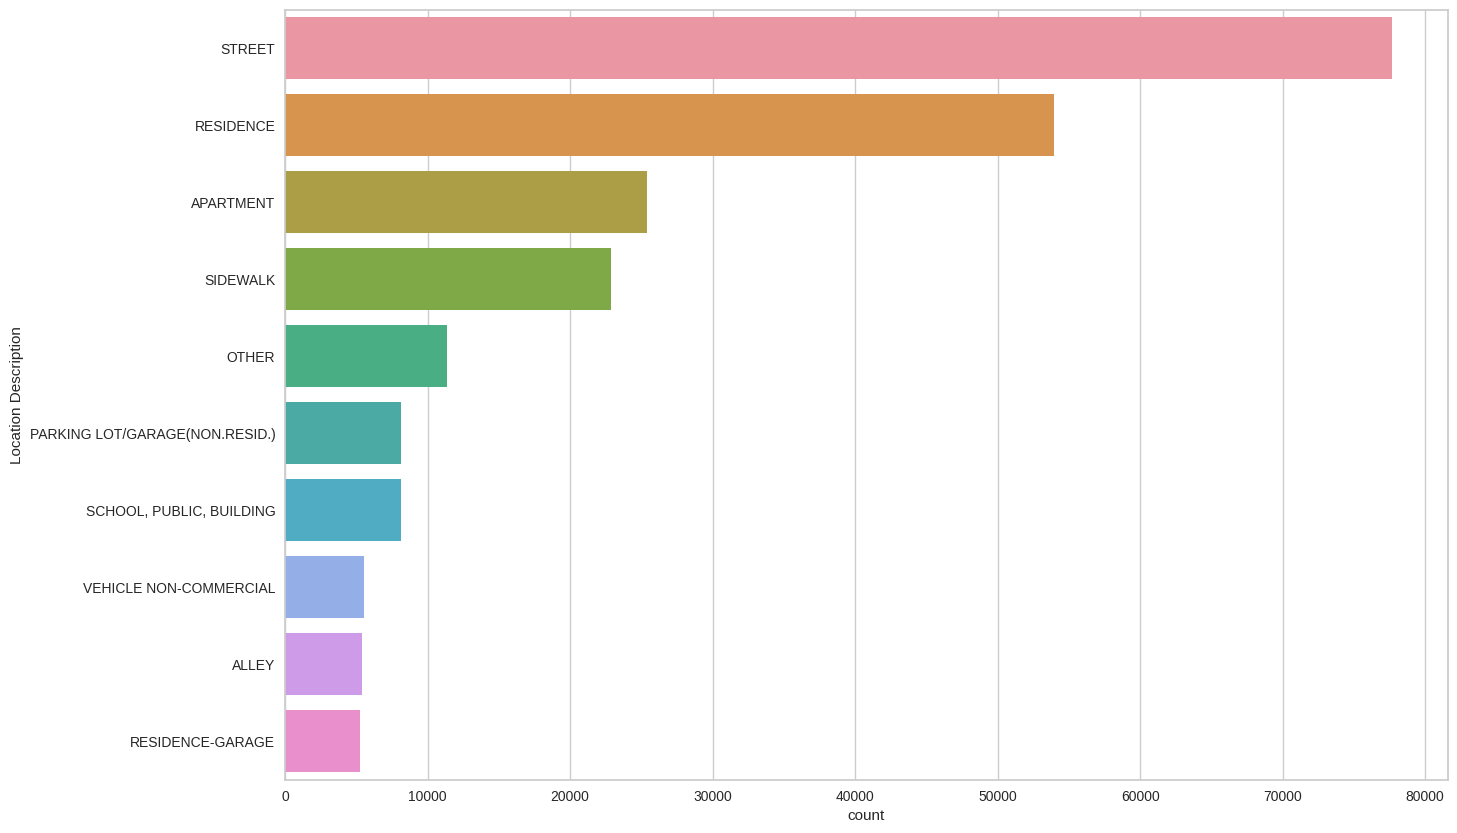

In [ ]:
pl.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:10].index)

In [ ]:
import folium

In [ ]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [ ]:
locations = data.groupby('Community Area').first()

In [ ]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [ ]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [ ]:
chicago_map